# Asssignment on Predicting and Visualizing Stock Price for Years 

###### Using InvestPy Library for Loading and Extracting Share Price history of a share.

In [10]:
#Installing InvestPy Library
!pip install investpy

In [11]:
# Importing Necessary Modules or Library that could be used in a program.
import investpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#Initializing Stocks Variable to list all the stocks.
stocks = investpy.get_stocks_list()

#Printing Stocks
print(stocks)

['TS', 'APBR', 'GGAL', 'TXAR', 'PAMP', 'TECO2', 'BPAT', 'ALUA', 'BBAR', 'BMA', 'EDN', 'TRAN', 'MIRG', 'BHIP', 'AGRO', 'AUSO', 'GAMI', 'BOLT', 'CGPA2', 'CADO', 'CARC', 'CAPU', 'CECO2', 'CELU', 'CEPU', 'GCLA', 'COLO', 'COME', 'CTIO', 'CAPX', 'CRES', 'DYCA', 'DGCU2', 'FERR', 'FIPL', 'GARO', 'GBAN', 'GRIM', 'INDU', 'IRSA', 'HARG', 'LEDE', 'LONG', 'METR', 'MOLI', 'MORI', 'OEST', 'PATA', 'POLL', 'PSUR', 'PATY', 'RIGO', 'BRIO', 'ROSE', 'IRCP', 'SEMI', 'SAMI', 'TEF', 'TGNO4', 'TGSU2', 'YPFD', 'INVJ', 'CVX', 'C', 'BAC', 'T', 'CAT', 'INTC', 'MSFT', 'ARNC', 'DISN', 'CSCO', 'JPM', 'KMB', 'MCD', 'MRK', 'MMM', 'RDS', 'PHG', 'NVS', 'SIEGY', 'TOT', 'BBV', 'NOKA', 'BHP', 'SAP', 'AAPL', 'NGG', 'UN', 'CL', 'DD', 'PFE', 'WMT', 'HD', 'IBM', 'SNE', 'VZ', 'BMY', 'NEM', 'JNJ', 'GE', 'AUY', 'HPQ', 'TM', 'PEP', 'PTR', 'CHL', 'NKE', 'PG', 'VALE', 'OGZD', 'GOLD', 'BBD', 'OVOP', 'ESME', 'AIG', 'APBRA', 'AXP', 'BSBR', 'DOME', 'GOOGL', 'HMC', 'INTR', 'KO', 'LMT', 'MELI', 'BRIO6', 'TGLT', 'TXR', 'SUPV', 'HAVA', 'PGR'

## Here I'm Extracting the Share Price history of State Bank of India listed on NSE India.  

In [13]:
# Extracting and Saving Share Price History in a Pandas DataFrame. 

df = investpy.get_stock_historical_data(stock='sbi',
                                        country='India',
                                        from_date='01/01/2010',
                                        to_date='31/12/2020')

In [14]:
#Checking the shape of a DataFrame for Rows and Columns.
df.shape

(2730, 6)

In [15]:
#Extracting only the Closing Price of a Share Only and saving it in another DataFrame
useful_df= df[['Close']]

In [16]:
#Checking First 5 Records.
useful_df.head()

,Close
Date,
2010-01-04,229.12
2010-01-05,229.21
2010-01-06,230.58
2010-01-07,229.29
2010-01-08,228.60


### Plotting the actual Share Price of SBI Share from Jan 2010 to Dec 2020.

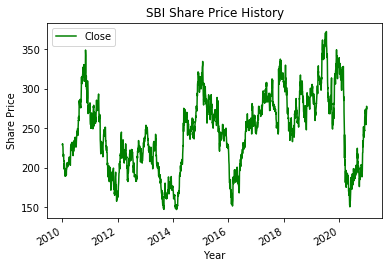

In [17]:
# Plotting the Share Price History using Matplotlib.
useful_df.plot(color='green')
plt.title('SBI Share Price History')
plt.xlabel('Year')
plt.ylabel('Share Price')
plt.rcParams["figure.figsize"]=(15,9)
plt.show()

# Building Prediction Model Using LSTM(Long Short-Term Memory network)

### Installing TensorFlow Library for Building Machine Learning Models

In [19]:
#Installing Tensorflow
!conda install tensorflow

Solving environment: ...working... done

# All requested packages already installed.



In [20]:
# Installing Keras Library for Creating Neural Networks
!conda install keras

Solving environment: ...working... done

# All requested packages already installed.



In [21]:
#Importing required libraries for Model Building
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.
C:\Users\ADMIN\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ADMIN\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ADMIN\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ADMIN\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

## Implementation

In [22]:
#Creating Dataset

dataset=useful_df.values

#Splitting the Dataset into Training and Validating Data
train=useful_df[:2478]

valid=useful_df[2478:]

#Converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# Create and Fitting the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = useful_df[len(useful_df) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)



Epoch 1/1
 - 86s - loss: 0.0029


### Checking Root Mean Squared Value to check the correctness of Model

In [23]:
# Results
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
print(rms)

Close    8.765233
dtype: float64


## Plotting the Predicting and Actual Data of Share Price

C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


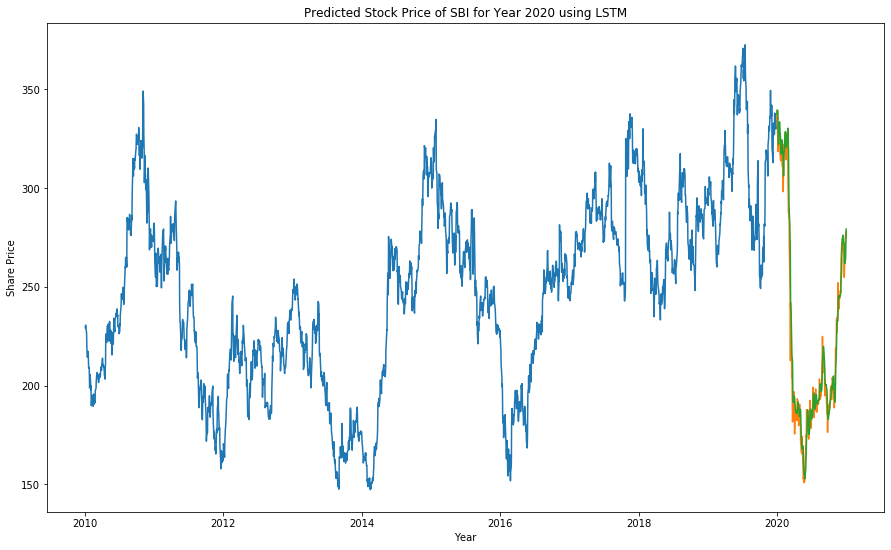

In [24]:
#For plotting
train = useful_df[:2478]
valid = useful_df[2478:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.title('Predicted Stock Price of SBI for Year 2020 using LSTM')
plt.xlabel('Year')
plt.ylabel('Share Price')
plt.plot(valid[['Close','Predictions']])
plt.rcParams["figure.figsize"]=(15,9)

# Thank You

## Made By : Akshat Jain
## Mail: akshatj355@gmail.com
## Contact: +918573928410